In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from timeit


# Case 1: Binomial Trees

Asha de Meij (i6254733)

**Task:** Consider the unit-linked contract with maturity guarantee that was discussed in the lecture.
Take the risk-free rate equal to r = 1%, the volatility of the investment fund o = 15% and
the final guaranteed amount at T = 10 equal to 100 (i.e., we have a contract with a 0%
guarantee).

Make a computer program where you increase the number of steps in the binomial tree from 4 to 100 and
make a graph of how the price of the contract as a function of the number of steps develops.

# Code

In [ ]:
r = 0.01
sigma = 0.15
T = 10 
guarantee = 100
n = 100

In [ ]:
def get_optionPrice(r, sigma, T, guarantee, n):

    # Formulas from slides
    dt = T/n
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u

    R_dt = np.exp(r*dt) # growth factor at each time step
    p = (R_dt - d) / (u - d) # Risk-neutral probability
    q = 1 - p


    # Stock price calculations
    stockValues = np.zeros((n+1, n+1))
    stockValues[0,0] = 100 # Initial value
    
    for i in range(1,n+1):
        stockValues[i,0] = u*stockValues[i-1,0]
        for j in range(1,i+1):
           stockValues[i,j] = d*stockValues[i-1,j-1]



    # contract price calculations
    contractPrice = np.zeros((n+1, n+1))

    for i in range(n+1):
         contractPrice[n,i] = np.maximum(guarantee,stockValues[n,i]) 
         
    for i in range(n - 1, -1, -1):
        for j in range(i+1):
            contractPrice[i,j] = (1/R_dt)*(p*contractPrice[i+1,j] + q*contractPrice[i+1,j+1])

       
    return contractPrice[0,0]

Price of the Contract:  113.43953782342845


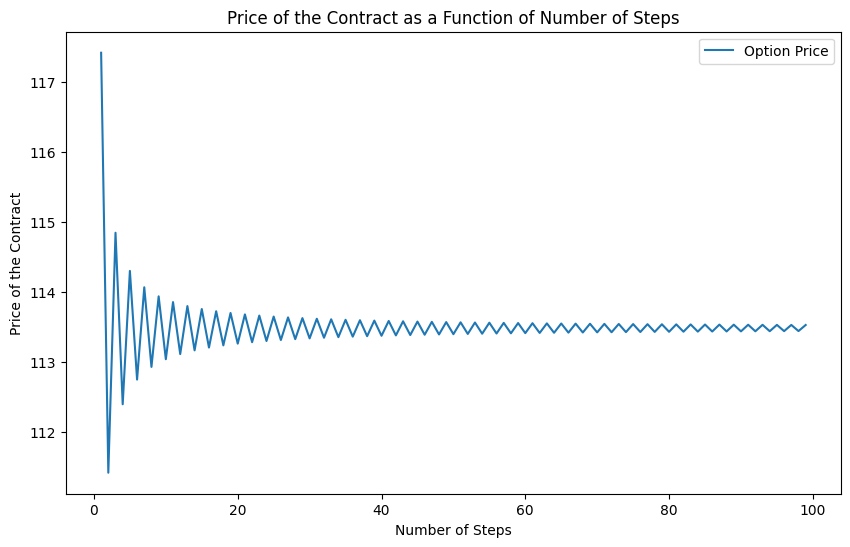

In [27]:
step_counts = range(1, 100)
prices = [get_optionPrice(r, sigma, T, guarantee, n) for n in step_counts]

print("Price of the Contract: ", get_optionPrice(r, sigma, T, guarantee, n)) 


plt.figure(figsize=(10, 6))
plt.plot(step_counts, prices, label='Option Price')
plt.xlabel('Number of Steps')
plt.ylabel('Price of the Contract')
plt.title('Price of the Contract as a Function of Number of Steps')
plt.legend()
plt.show()

**Questions:**
1. Can you explain the pattern that you see in the graph? To help you investigate the
convergence pattern, make an extra plot of the stock price S, in two nearest nodes
at T = 10, just above and below the guarantee level, as a function of the number of
steps.

The graph shows that in the early time steps, there are significant fluctuations with large ups and downs movements. However, as time progresses, while the same pattern of  continues, it gradually converges to a stable value which lies between 113-114.

The plot below shows the stock price S, in two nearest nodes
at T = 10, just above and below the guarantee level, as a function of the number of
steps.


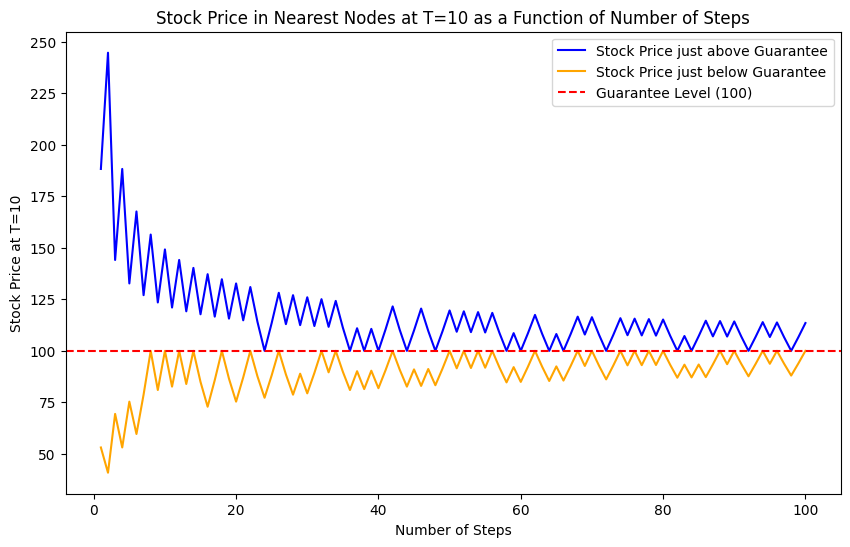

In [23]:
from IPython.display import Image
Image("/Users/ashademeij/Downloads/Mathematical Finance/MathematicalFinance/output.png")

In the image above, the blue line represents the stock price just above the guarantee level, while the orange line represents the stock price just below it. As more time passes, both lines start to get closer to the guarantee level. The binomial model considers all possible paths a stock price can follow, hence as time passes we can get a better idea of how it behaves on average, so the model becomes less uncertain. This also explains the patterns which we can see on the graph representing "the Price of the Contract as a Function of Number of Steps", as more time passes the model is less uncertain hence it converges.

2. When you keep the number of steps fixed (say 100), how does the price of the
contract change if you change r or o or T. Can you explain these changes?

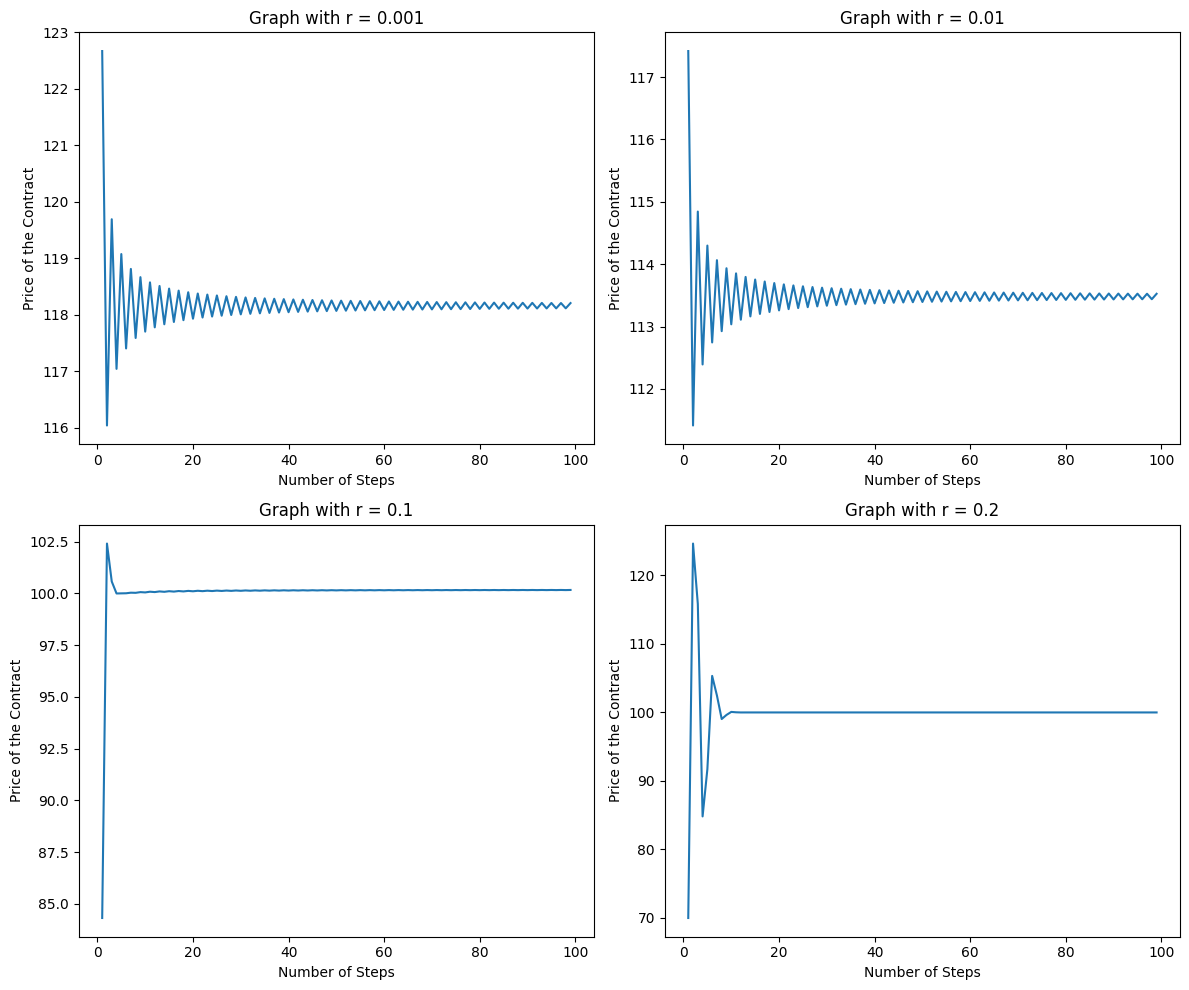

In [28]:
# First we can check for different numbers of r
step_counts = range(1, 100)
r_values = [0.001, 0.01, 0.1, 0.2]  

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, r in enumerate(r_values):
    prices = [get_optionPrice(r, sigma, T, guarantee, n) for n in step_counts]
    
    axes[i].plot(step_counts, prices)
    axes[i].set_xlabel('Number of Steps')
    axes[i].set_ylabel('Price of the Contract')
    axes[i].set_title(f'Graph with r = {r}')

plt.tight_layout()
plt.show()

**How does the price of the contract change if you change r?**
The price of contract is more expensive for smaller values of R (cheaper for bigger values of r). The outcome is explauned by the fact that  leaving money in the bank doesn’t grow much which makes the contract more attractive since it seems like a better way to use the money. If r is big leaving the money in the bank is more rewarding hence the contract price goes down.

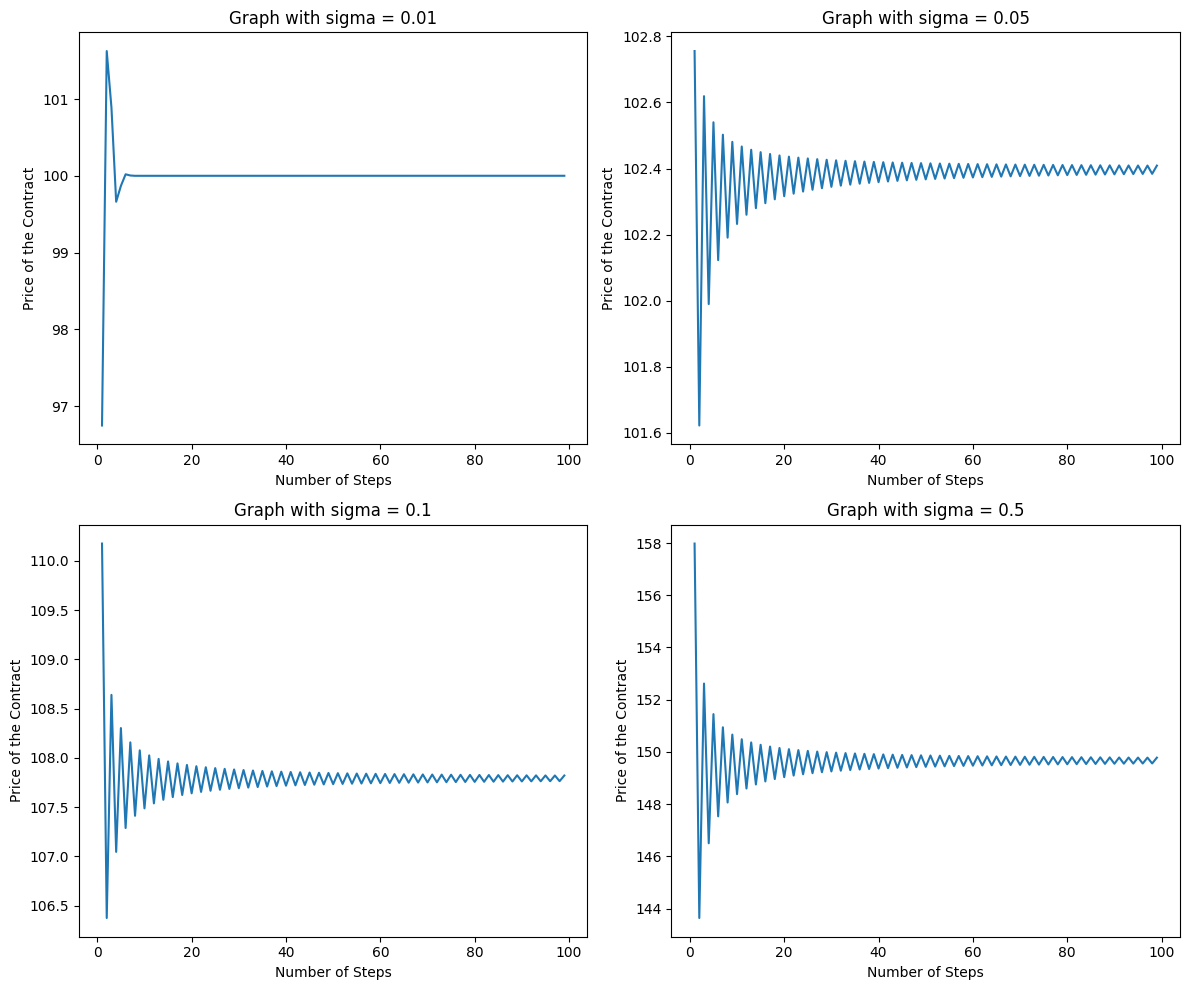

In [30]:
# Now we can check for different numbers of sigma
step_counts = range(1, 100)
sigma_values = [0.01, 0.05, 0.1, 0.5]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, sigma in enumerate(sigma_values):
    prices = [get_optionPrice(r, sigma, T, guarantee, n) for n in step_counts]
    
    axes[i].plot(step_counts, prices)
    axes[i].set_xlabel('Number of Steps')
    axes[i].set_ylabel('Price of the Contract')
    axes[i].set_title(f'Graph with sigma = {sigma}')

plt.tight_layout()
plt.show()

**How does the price of the contract change if you change sigma?**

With lower sigma the price of the contract is cheaper, when it is higher the price becomes higher. The results make sense since high volatility increases the probability that the contract will end up profitable because there’s more room for upward price movements. If the sigma is low there is not much "space" for the contract to become profitable.

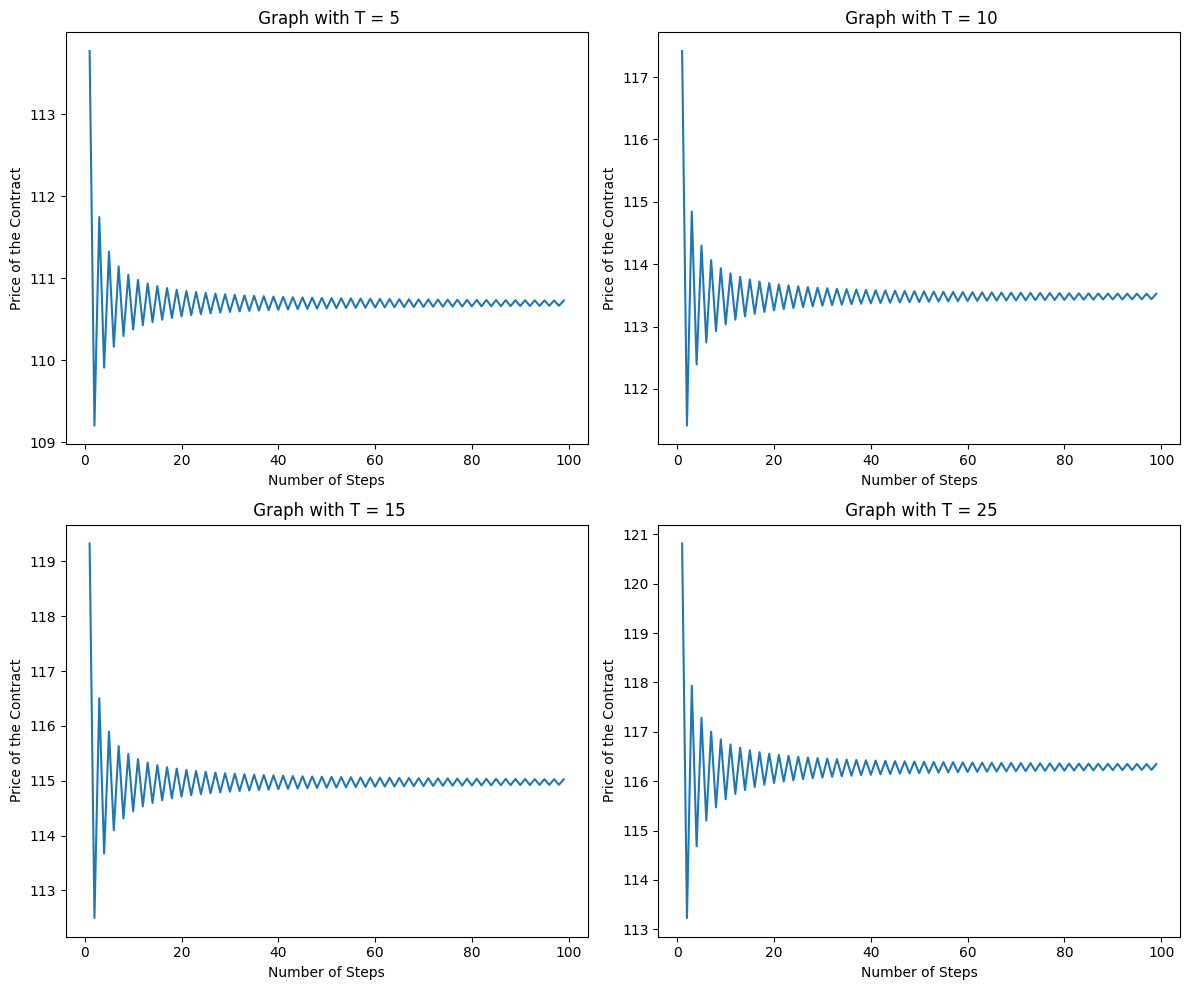

In [33]:
# Now we can do the same for different numbers of T
T_values = [5, 10, 15, 25]  

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, T in enumerate(T_values):
    prices = [get_optionPrice(r, sigma, T, guarantee, n) for n in step_counts]
    
    axes[i].plot(step_counts, prices, label=f'Option Price for T = {T}')
    axes[i].set_xlabel('Number of Steps')
    axes[i].set_ylabel('Price of the Contract')
    axes[i].set_title(f' Graph with T = {T}')

plt.tight_layout()
plt.show()

**How does the price of the contract change if you change T?**

Similarly, as T is smaller the price of contract is lower compared to when its higher. This result follows form the fact that the stock price has more time to increase since there is more time and obvioulsy also because the guarantee holds for a longer time period

**3. Can you modify your program to make it run faster (e.g., for a tree with 10 000
steps)? If so, what changes did you make compared to your initial code? Describe
how you have analysed the run-time of the code.**

I previously used for loops (even worse "nested" for loops :D) to compute the stock as well as the option price. However, if i were to consider 10 000 time steps (or perhaps even more) the matrices would grow enormously. This problem can be solved using vector operations, in other words by vectorizing the problem.

In [ ]:
def get_optionPrice_2(r, sigma, T, guarantee, n):

    dt = T / n
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    R_dt = np.exp(r * dt)
    p = (R_dt - d) / (u - d)
    q = 1 - p


    # Stock price matrix
    stockValues = 100 * u**np.arange(n + 1) * d**(n - np.arange(n + 1))

    # init option prices at maturity
    contractPrice = np.maximum(stockValues, guarantee)

    # calculate option prices at each node
    for i in np.arange(n,0,-1):
        contractPrice = (1/R_dt) * (p * contractPrice[1:i+1] + q * contractPrice[0:i])

    return contractPrice[0]

In [58]:
start_time = time.time()

option_price = get_optionPrice(r, sigma, T, guarantee, n=10000)
print("Option Price:", option_price)

end_time = time.time()

duration = end_time - start_time
print("Time taken: {:.6f} seconds".format(duration))

Option Price: 113.48452148556859
Time taken: 39.226404 seconds


In [57]:
start_time = time.time()

option_price = get_optionPrice_2(r, sigma, T, guarantee, n=10000)
print("Option Price:", option_price)

end_time = time.time()

duration = end_time - start_time
print("Time taken: {:.6f} seconds".format(duration))

Option Price: 13.439537823428806
Time taken: 0.002001 seconds


Using the time library from python I investigated the run time, by doing the following:
- ran the "original" binomial model with non vectorization with n= 10 000 (time taken = 39.226404 seconds)
- ran the "optimized" binomial model with vectorization with n= 10 000 (time taken = 0.002001 seconds)

We can see that the optimized version is drastically faster than the original model.
